In [1]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
import copy
import torch
%load_ext autoreload
%autoreload 2

In [3]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [4]:
data = eleanor.TargetData(star, height=15, width=15, do_pca=True, do_psf=False)

In [2]:
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400

In [8]:
data_m = copy.deepcopy(data)
data_z = copy.deepcopy(data)
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], 
                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)
#data_m.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
#                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='moffat', xc=[4.9, 4.5, 4.7],
#                        yc=[3.0, 4.4, 7.0], ignore_pixels=1)

0%|          | 0/900 [00:00<?, ?it/s][1.58314727e+04 1.58314727e+04 1.58314727e+04 1.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]



AttributeError: 'list' object has no attribute 'size'

In [38]:
data_z.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], verbose=True, nstars=3, model='zernike', xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1)

NameError: name 'data_z' is not defined

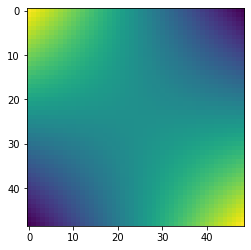

In [76]:
s = 49
zern = eleanor.models.Zernike((s,s),0,0)
x, y = zern.x - np.median(zern.x), zern.y - np.median(zern.y)
plt.imshow(zern.zernike(3).eval(session=sess) * (x ** 2 + y ** 2 < (s//2) ** 2))

"psf_flux = np.sum(data.all_psf, axis=1)\n# plt.plot(sc.time[sq][start:end], psf_flux / np.max(psf_flux), label='Gaussian-fit PSF')\nplt.plot(time, psf_flux / np.max(psf_flux), label='Zernike-fit PSF sum')\nfor i in range(3):\n    plt.plot(time, data.all_psf[:,i] / np.max(data.all_psf[:,i]), label='Zernike-fit PSF' + str(i))\nplt.legend()"

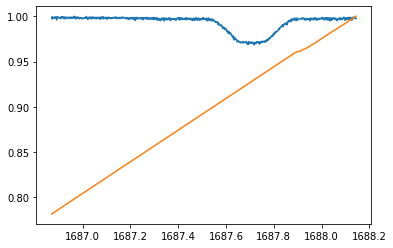

In [17]:
time = sc.time[sq][start:end]
photometry_flux = sc.to_lightcurve().flux[sq][start:end]
plt.plot(time, photometry_flux / np.max(photometry_flux), label='aperture photometry')
plt.plot(time, data.psf_flux[:end-start] / np.max(data.psf_flux[:end-start]))
'''psf_flux = np.sum(data.all_psf, axis=1)
# plt.plot(sc.time[sq][start:end], psf_flux / np.max(psf_flux), label='Gaussian-fit PSF')
plt.plot(time, psf_flux / np.max(psf_flux), label='Zernike-fit PSF sum')
for i in range(3):
    plt.plot(time, data.all_psf[:,i] / np.max(data.all_psf[:,i]), label='Zernike-fit PSF' + str(i))
plt.legend()'''

In [26]:
print(lk.estimate_cdpp(photometry_flux, transit_duration=1))
print(lk.estimate_cdpp(psf_flux, transit_duration=1))

766.824152995914
0.0
